
# Room_Updated

Analysis is done on basis of files that were proccessed at first 9 days of the December 2021.


## Import the relevant libraries

In [13]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
sns.set()

## Load all parquet files that were available with that message

In [14]:
RoomUpdated_Messages = pd.read_parquet("Documents/ugo_room_updated", engine='auto')
RoomUpdated_Messages

RoomNotifications
0   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
1   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
2   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
3   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
4   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
5   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
6   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
7   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
8   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
9   [{'NotificationMeta': {'X-Correlation-ID': 'OF...
10  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
11  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
12  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
13  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
14  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
15  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
16  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
17  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
18  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
19  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
20  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
21  [{'NotificationMeta': {'X-Correlation-ID': 'OF...
22  [{'NotificationMeta': {'X-Correlation-ID': 'OF...

## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [15]:
firstLevel = []
for index, level in RoomUpdated_Messages.iterrows():
    firstLevel.extend(RoomUpdated_Messages.iloc[index,0])

### Resolving all levels of nesting<hr>

In [16]:
import pandas as pd
import numpy as np
import ast

def resolveRow(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def createDF(li, key_level=""):
    listOfResolved = []
    for level in li:
        row_data = None
        level1 = {}
        wrong = []
        if not isinstance(level, str):          
            for key, value in level.items():
                if isinstance(value, np.ndarray):
                    if (value.size!=0):
                        row_data = createDF(value, key)
                    else:
                        level1[key_level + "_" + key] = []
                        
                elif isinstance(value, dict):
                    level1.update(value)
                elif isinstance(value, list):
                    for i in value:
                        if isinstance(i, dict):
                            level1.update(i)
                else:
                    level1[key_level + "_" + key] = value

            if row_data is not None:
                newDi = resolveRow(level1, row_data)
                listOfResolved.extend(newDi)
            else:
                listOfResolved.append(level1)
        else:
            wrong.append(level)
            
    return listOfResolved


def checkType(new):
    key_types = []
    values_t = []
    for n in new:
        new_keys = [type(z) for z in n.values()]
        if (new_keys in key_types) | len(key_types) == 0:
            key_types.append(new_keys)
        else:
            continue
    for z in key_types:
        values_t.extend([True if n in [np.ndarray, dict, list] else False for n in z])

    return any(values_t)

def allTogether(firstLevel):
    levelTemp = createDF(firstLevel)
    while checkType(levelTemp):
        newL = createDF(levelTemp)
        levelTemp = newL
    return levelTemp
    
final = allTogether(firstLevel)


### Creating DataFrame<hr>

In [17]:
finalData_raw = pd.DataFrame(final)
finalData_raw.columns = [re.sub("^_+","",x) for x in finalData_raw.columns]
finalData_raw

X-Correlation-ID          Type CmHotelId CmRoomId     Origin  \
0         OFF321815-4  ROOM_UPDATED      None     KSBN  derbysoft   
1         OFF321815-6  ROOM_UPDATED      None     KBUN  derbysoft   
2         OFF321815-7  ROOM_UPDATED      None     OAHN  derbysoft   
3         OFF321815-7  ROOM_UPDATED      None     OAIN  derbysoft   
4         OFF321815-7  ROOM_UPDATED      None     TVUG  derbysoft   
...               ...           ...       ...      ...        ...   
1094      OFF322008-9  ROOM_UPDATED      None     CDXN  derbysoft   
1095      OFF322008-9  ROOM_UPDATED      None     KVUN  derbysoft   
1096      OFF322008-9  ROOM_UPDATED      None     TQNN  derbysoft   
1097      OFF322008-9  ROOM_UPDATED      None     CSTN  derbysoft   
1098      OFF322008-9  ROOM_UPDATED      None     OQNN  derbysoft   

                                      Name  MaxAdults MinAdults  \
0           1 King Bed Suite With Sofa Bed          2      None   
1         1 King Bed Premium With Sofa Bed          2      None   
2     1 Queen Bed Executive  With Sofa Bed          2      None   
3           1 Queen Standard With Sofa Bed          2      None   
4               2 Double Bed Standard Room          2      None   
...                                    ...        ...       ...   
1094                          Premium Room          2      None   
1095       1 King Bed Premium Harbour View          2      None   
1096        2 Queen Beds Premium City View          2      None   
1097                         Standard Room          2      None   
1098                  1 Queen Bed Standard          2      None   

      ExtraChildren  MaxChildAge ApplicableRatePlans Description  \
0               1.0         16.0                None        None   
1               1.0         16.0                None        None   
2               1.0         16.0                None        None   
3               1.0         16.0                None        None   
4               1.0         16.0                None        None   
...             ...          ...                 ...         ...   
1094            NaN          NaN                None        None   
1095            NaN          NaN                None        None   
1096            NaN          NaN                None        None   
1097            NaN          NaN                None        None   
1098            NaN          NaN                None        None   

     BedConfigurations SmokingPermitted  Fees OriginalData  
0                 None             None  None               
1                 None             None  None               
2                 None             None  None               
3                 None             None  None               
4                 None             None  None               
...                ...              ...   ...          ...  
1094              None             None  None               
1095              None             None  None               
1096              None             None  None               
1097              None             None  None               
1098              None             None  None               

[1099 rows x 16 columns]

### Creating working dataset

In [18]:
RoomUpdated = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [19]:
RoomUpdated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X-Correlation-ID     1099 non-null   object 
 1   Type                 1099 non-null   object 
 2   CmHotelId            0 non-null      object 
 3   CmRoomId             1099 non-null   object 
 4   Origin               1099 non-null   object 
 5   Name                 1098 non-null   object 
 6   MaxAdults            1099 non-null   int64  
 7   MinAdults            0 non-null      object 
 8   ExtraChildren        406 non-null    float64
 9   MaxChildAge          406 non-null    float64
 10  ApplicableRatePlans  0 non-null      object 
 11  Description          442 non-null    object 
 12  BedConfigurations    0 non-null      object 
 13  SmokingPermitted     0 non-null      object 
 14  Fees                 0 non-null      object 
 15  OriginalData         1099 non-null   o

In [20]:
RoomUpdated.head(5).transpose()

0  \
X-Correlation-ID                        OFF321815-4   
Type                                   ROOM_UPDATED   
CmHotelId                                      None   
CmRoomId                                       KSBN   
Origin                                    derbysoft   
Name                 1 King Bed Suite With Sofa Bed   
MaxAdults                                         2   
MinAdults                                      None   
ExtraChildren                                   1.0   
MaxChildAge                                    16.0   
ApplicableRatePlans                            None   
Description                                    None   
BedConfigurations                              None   
SmokingPermitted                               None   
Fees                                           None   
OriginalData                                          

                                                    1  \
X-Correlation-ID                          OFF321815-6   
Type                                     ROOM_UPDATED   
CmHotelId                                        None   
CmRoomId                                         KBUN   
Origin                                      derbysoft   
Name                 1 King Bed Premium With Sofa Bed   
MaxAdults                                           2   
MinAdults                                        None   
ExtraChildren                                     1.0   
MaxChildAge                                      16.0   
ApplicableRatePlans                              None   
Description                                      None   
BedConfigurations                                None   
SmokingPermitted                                 None   
Fees                                             None   
OriginalData                                            

                                                        2  \
X-Correlation-ID                              OFF321815-7   
Type                                         ROOM_UPDATED   
CmHotelId                                            None   
CmRoomId                                             OAHN   
Origin                                          derbysoft   
Name                 1 Queen Bed Executive  With Sofa Bed   
MaxAdults                                               2   
MinAdults                                            None   
ExtraChildren                                         1.0   
MaxChildAge                                          16.0   
ApplicableRatePlans                                  None   
Description                                          None   
BedConfigurations                                    None   
SmokingPermitted                                     None   
Fees                                                 None   
OriginalData                                                

                                                  3  \
X-Correlation-ID                        OFF321815-7   
Type                                   ROOM_UPDATED   
CmHotelId                                      None   
CmRoomId                                       OAIN   
Origin                                    derbysoft   
Name                 1 Queen Standard With Sofa Bed   
MaxAdults                                         2   
MinAdults                                      None   
ExtraChildren                                   1.0   
MaxChildAge                                    16.0   
ApplicableRatePlans                            None   
Description                                    None   
BedConfigurations                              None   
SmokingPermitted                               None   
Fees                                           None   
OriginalData                                          

                                              4  
X-Correlation-ID                    OFF321815-7  
Type                               ROOM_UPDATED  
CmHotelId           

### Basic statistic for data<hr>

In [21]:
RoomUpdated.describe(include='all').transpose()

count unique  \
X-Correlation-ID       1099    262   
Type                   1099      1   
CmHotelId                 0      0   
CmRoomId               1099    256   
Origin                 1099      2   
Name                   1098    678   
MaxAdults            1099.0    NaN   
MinAdults                 0      0   
ExtraChildren         406.0    NaN   
MaxChildAge           406.0    NaN   
ApplicableRatePlans       0      0   
Description             442    326   
BedConfigurations         0      0   
SmokingPermitted          0      0   
Fees                      0      0   
OriginalData           1099      1   

                                                                   top  freq  \
X-Correlation-ID                                          OFF321882-15    15   
Type                                                      ROOM_UPDATED  1099   
CmHotelId                                                          NaN   NaN   
CmRoomId                                                          CSTN    64   
Origin                                                       derbysoft   656   
Name                                                     Standard Room    50   
MaxAdults                                                          NaN   NaN   
MinAdults                                                          NaN   NaN   
ExtraChildren                                                      NaN   NaN   
MaxChildAge                                                        NaN   NaN   
ApplicableRatePlans                                                NaN   NaN   
Description          1 KING DELUXE MOBILITY ACCESSIBLE ROOM NSMK WI...     4   
BedConfigurations                                                  NaN   NaN   
SmokingPermitted                                                   NaN   NaN   
Fees                                                               NaN   NaN   
OriginalData                                                            1099   

                         mean       std   min   25%   50%   75%   max  
X-Correlation-ID          NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Type                      NaN       NaN   NaN   NaN   NaN   NaN   NaN  
CmHotelId                 NaN       NaN   NaN   NaN   NaN   NaN   NaN  
CmRoomId                  NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Origin                    NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Name                      NaN       NaN   NaN   NaN   NaN   NaN   NaN  
MaxAdults            1.735214  0.467473   1.0   1.0   2.0   2.0   3.0  
MinAdults                 NaN       NaN   NaN   NaN   NaN   NaN   NaN  
ExtraChildren        1.246305  0.437076   1.0   1.0   1.0   1.0   3.0  
MaxChildAge              16.0       0.0  16.0  16.0  16.0  16.0  16.0  
ApplicableRatePlans       NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Description               NaN       NaN   NaN   NaN   NaN   NaN   NaN  
BedConfigurations         NaN       NaN   NaN   NaN   NaN   NaN   NaN  
SmokingPermitted          NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Fees                      NaN       NaN   NaN   NaN   NaN   NaN   NaN  
OriginalData              NaN       NaN   NaN   NaN   NaN   NaN   NaN

#### Checking unique values for OriginalData

In [22]:
RoomUpdated.OriginalData.unique()

array([''], dtype=object)

#### Removing columns with 0 values/null values, that gives nothing to analysis

In [23]:
RoomUpdated = RoomUpdated.drop(columns=["CmHotelId", "MinAdults","ApplicableRatePlans","BedConfigurations","SmokingPermitted", "Fees"])

In [24]:
RoomUpdated.describe(include = "all").transpose()

count unique  \
X-Correlation-ID    1099    262   
Type                1099      1   
CmRoomId            1099    256   
Origin              1099      2   
Name                1098    678   
MaxAdults         1099.0    NaN   
ExtraChildren      406.0    NaN   
MaxChildAge        406.0    NaN   
Description          442    326   
OriginalData        1099      1   

                                                                top  freq  \
X-Correlation-ID                                       OFF321882-15    15   
Type                                                   ROOM_UPDATED  1099   
CmRoomId                                                       CSTN    64   
Origin                                                    derbysoft   656   
Name                                                  Standard Room    50   
MaxAdults                                                       NaN   NaN   
ExtraChildren                                                   NaN   NaN   
MaxChildAge                                                     NaN   NaN   
Description       1 KING DELUXE MOBILITY ACCESSIBLE ROOM NSMK WI...     4   
OriginalData                                                         1099   

                      mean       std   min   25%   50%   75%   max  
X-Correlation-ID       NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Type                   NaN       NaN   NaN   NaN   NaN   NaN   NaN  
CmRoomId               NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Origin                 NaN       NaN   NaN   NaN   NaN   NaN   NaN  
Name                   NaN       NaN   NaN   NaN   NaN   NaN   NaN  
MaxAdults         1.735214  0.467473   1.0   1.0   2.0   2.0   3.0  
ExtraChildren     1.246305  0.437076   1.0   1.0   1.0   1.0   3.0  
MaxChildAge           16.0       0.0  16.0  16.0  16.0  16.0  16.0  
Description            NaN       NaN   NaN   NaN   NaN   NaN   NaN  
OriginalData           NaN       NaN   NaN   NaN   NaN   NaN   NaN

#### Checking null values for CmRoomId

In [25]:
RoomUpdated.CmRoomId.isna().sum()

0

#### Checking null values for Origin

In [26]:
RoomUpdated.Origin.isna().sum()

0

In [27]:
RoomUpdated.Origin.unique()

array(['derbysoft', 'dhisco'], dtype=object)

#### Breaking CmRoomId by Origin

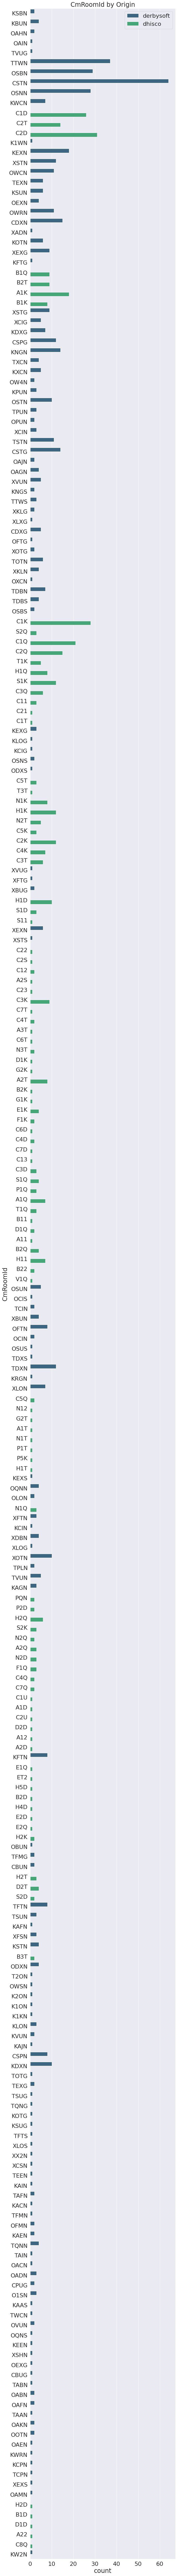

In [67]:
# plt.figure(figsize=(105,105))
sns.set(font_scale = 2, rc={"figure.figsize":(10,180)})
sns.countplot(y = RoomUpdated.CmRoomId, data = RoomUpdated, hue = RoomUpdated.Origin, palette = 'viridis', orient = "h")
plt.legend(loc='upper right')
plt.title("CmRoomId by Origin")
plt.show()

#### Checking against null values for Name

In [29]:
RoomUpdated.Name.isna().sum()

1

####  Breaking Name by Origin

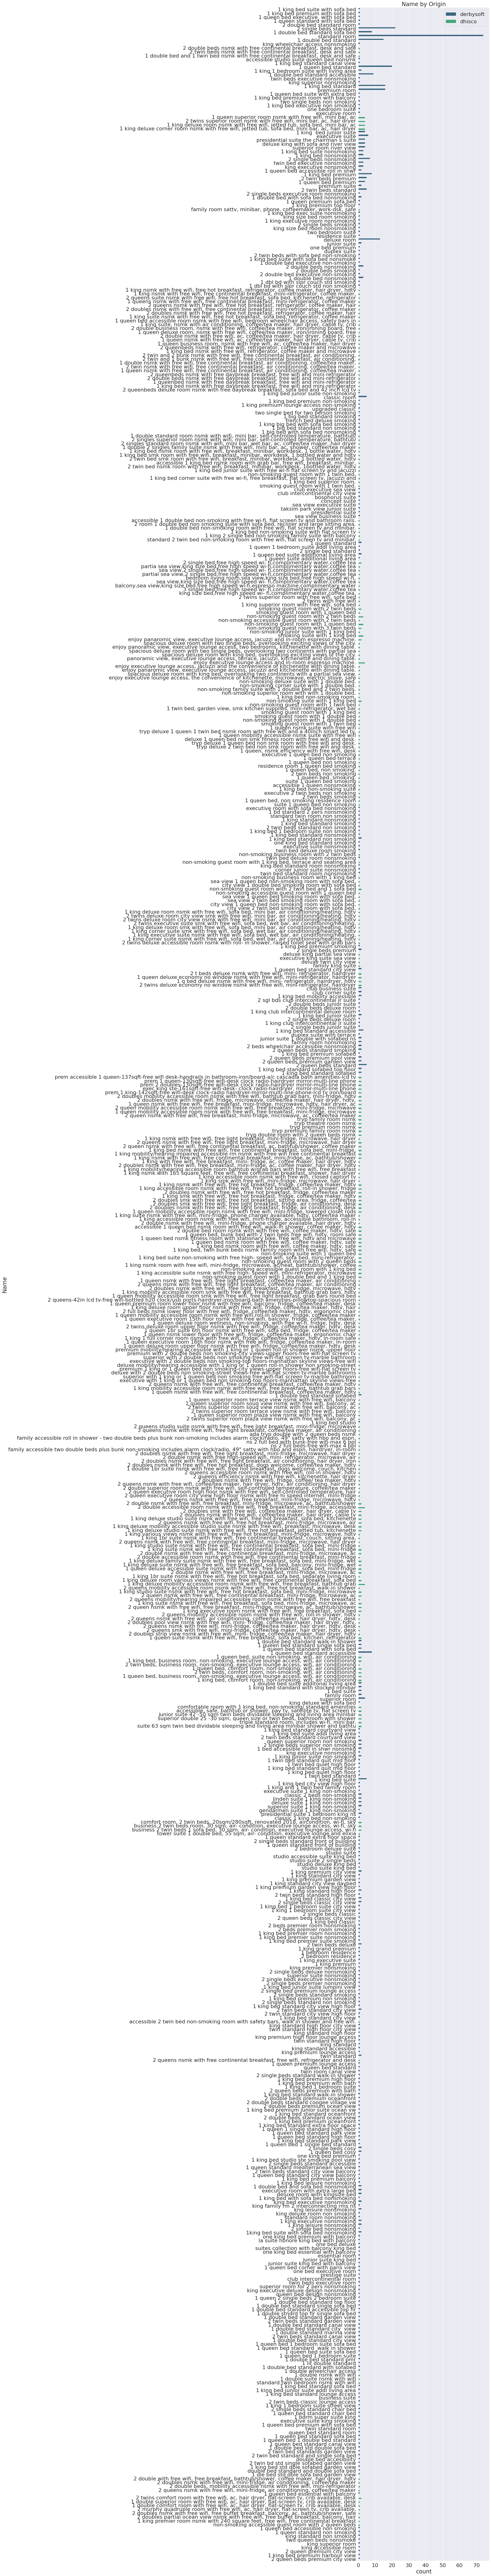

In [68]:
sns.set(font_scale = 2, rc={"figure.figsize":(10,200)})
sns.countplot(y = RoomUpdated.Name.str.lower(), hue = RoomUpdated.Origin, data = RoomUpdated, palette = 'viridis', orient = "h",)
plt.legend(loc='upper right')
plt.title('Name by Origin')
plt.show()

#### Checking against null values for MaxAdults

In [71]:
RoomUpdated.MaxAdults.isna().sum()

0

#### Breaking MaxAdults by Origin

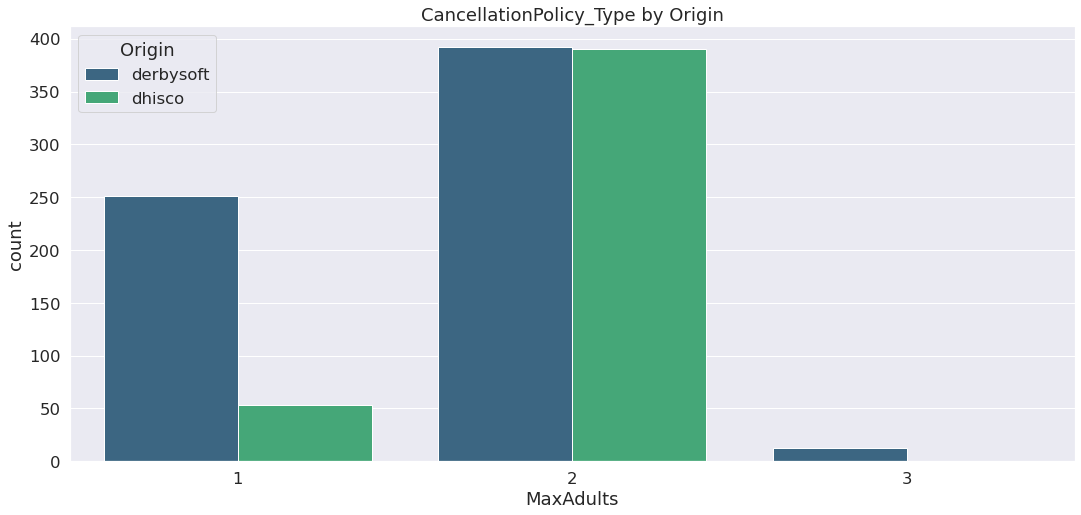

In [72]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = RoomUpdated.MaxAdults, hue = RoomUpdated.Origin, data = RoomUpdated, palette = 'viridis')
plt.title('CancellationPolicy_Type by Origin')
plt.show()

#### Checking against null values for ExtraChildren

In [73]:
RoomUpdated.ExtraChildren.isna().sum()

693

####  Breaking ExtraChildren by Origin

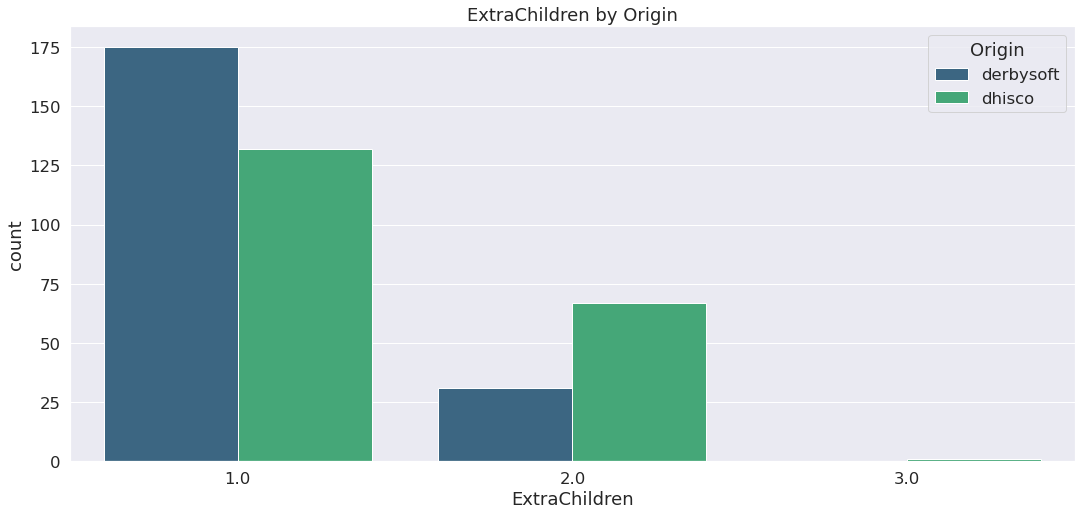

In [74]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = RoomUpdated.ExtraChildren, hue = RoomUpdated.Origin, data = RoomUpdated, palette = 'viridis')
plt.title('ExtraChildren by Origin')
plt.show()

#### Checking agains null value for MaxChildAge

In [75]:
RoomUpdated.MaxChildAge.isna().sum()

693

####  Breaking MaxChildAge by Origin

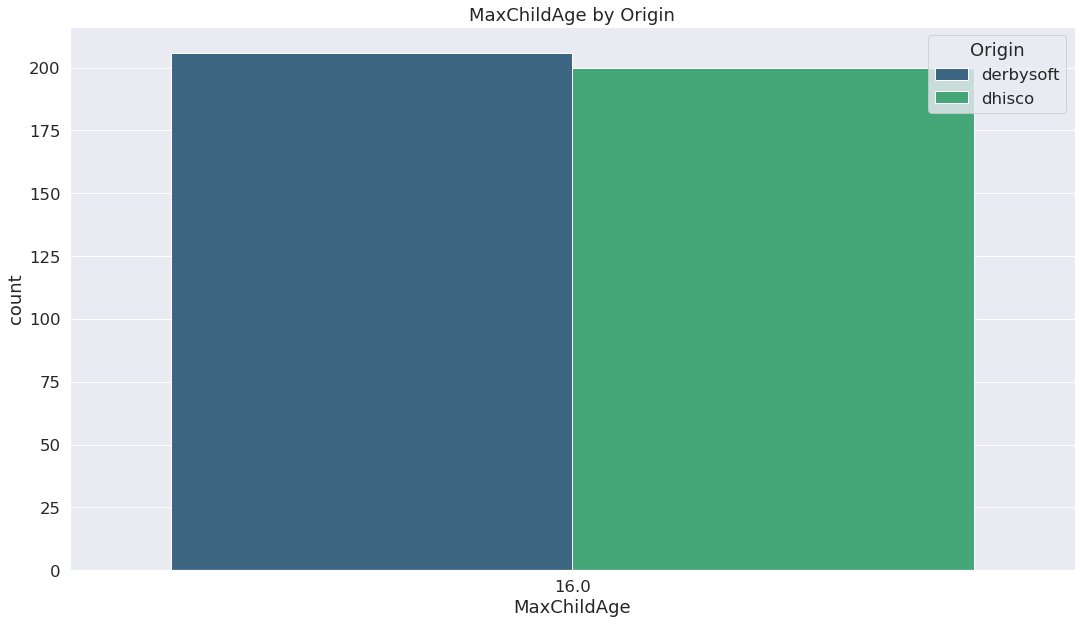

In [76]:
plt.figure(figsize=(18,10))
sns.set(font_scale = 1.5)
sns.countplot(x = RoomUpdated.MaxChildAge, hue = RoomUpdated.Origin, data = RoomUpdated, palette = 'viridis')
plt.title('MaxChildAge by Origin')
plt.show()